Q1. Gender Classification

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA (countplots, show images, find missing values etc.)

a. Use Base SVM(LinearSVC) model.

b. Create a CNN model with 3 Conv2D layers, 3 Maxpooling2D layers, any extra layers necessary.

c. Get atleast 90% test accuracy using the above CNN model.

Data: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

In [ ]:
# Your code here


Q2. Cement Strength Regression

Use train_test_split(random_state = 42,test_size = 0.2)

Do some EDA.

a. Use Linear, Ridge, and Lasso Regression.

b. Show results of the best model (least test data mean squared error) using a loop to compare the values.

c. Create any neural network you feel like making (RNN, CNN, ANN, or any other) and achieve a test data mean squared error lesser than the best model in part b.

Data: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df["Age"].value_counts

<bound method IndexOpsMixin.value_counts of 0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: Age, Length: 1030, dtype: int64>

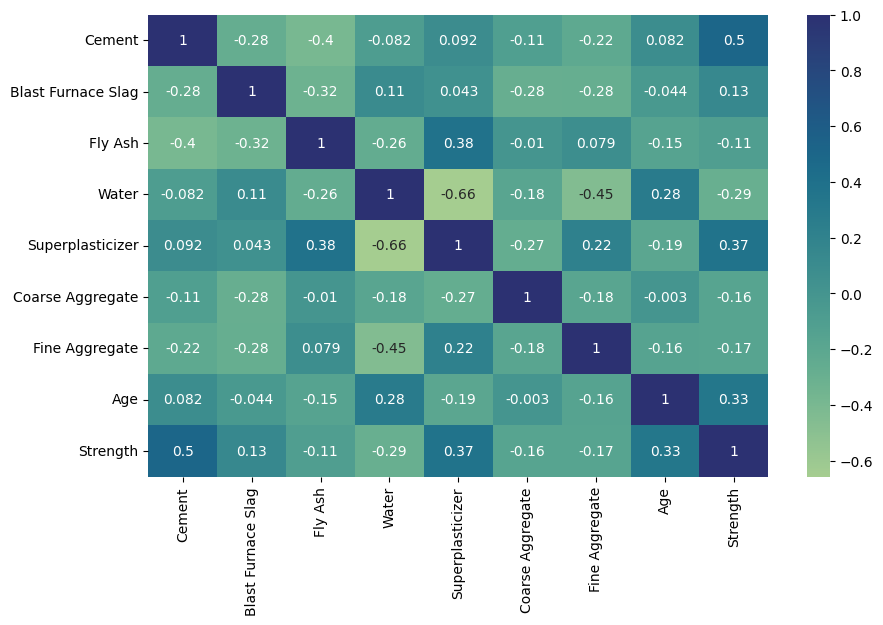

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap = 'crest', annot = True)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    df[i] = LabelEncoder().fit_transform(df[i])

In [11]:
x = df.drop(["Strength"],axis = 1)
y = df["Strength"]

In [12]:

from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Cement','Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age']
scaler = MinMaxScaler()
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 8)
(824,)
(206, 8)
(206,)


In [15]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression()
rg.fit(x_train, y_train)
y_pred = rg.predict(x_test)


In [16]:
y_pred

array([820.7435787 , 621.56906125, 824.01306511, 566.89603327,
       114.01704897, 502.6224111 , 260.49662417, 660.20834273,
       361.19923235, 535.06272324, 394.96782504, 226.73954287,
       618.52156393, 534.4408154 , 325.05112018, 406.55968238,
       389.61820204, 236.81109511, 364.40343166, 319.29373066,
       461.40448902, 528.5962927 , 480.31479141, 157.94366932,
       413.88716844, 417.77368887, 100.99415382, 562.99722331,
       639.6997065 , 184.55936571, 529.33723118, 425.71666729,
       502.24952364, 669.06099858, 215.41524437, 458.946966  ,
       359.13441106, 505.62054354, 111.44604474, 499.6580366 ,
       199.13506417,  26.34470732, 343.52868281, 627.90635357,
        41.54241554, 771.27644974, 693.68199847, 798.90531649,
       236.00017542,  49.13083246, 533.32315001, 467.36640325,
       335.39743431, 304.24756766, 463.83838872, 552.58433783,
       306.52620437, 131.41571088, 374.9315716 , 240.97904483,
       500.4019521 , 234.67803877, 424.25361138, 597.78

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

16379.954187313988

In [18]:
from sklearn.linear_model import Ridge,Lasso

clfs = [LinearRegression(), Ridge(), Lasso()]

for clf in clfs:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mse = np.mean((y_test - y_pred) ** 2)
    print("Mean squared error for", clf.__class__.__name__, ":", mse)

Mean squared error for LinearRegression : 16379.954187313988
Mean squared error for Ridge : 16313.110241654022
Mean squared error for Lasso : 16462.558407469085


In [19]:
import keras
import tensorflow

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error

classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=8))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation=None))

classifier.compile(optimizer='adam', loss='mean_squared_error')

classifier.fit(x_train, y_train, batch_size=10, epochs=10, verbose=0)

train_predictions = classifier.predict(x_train)
train_mse = mean_squared_error(y_train, train_predictions)
print('Train Mean Squared Error:', train_mse)

test_predictions = classifier.predict(x_test)
test_mse = mean_squared_error(y_test, test_predictions)
print('Test Mean Squared Error:', test_mse)






26/26 [==============================] - 0s 1ms/step
Train Mean Squared Error: 80610.32891221099
7/7 [==============================] - 0s 2ms/step
Test Mean Squared Error: 79592.25383430751
